In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
client_data=pd.read_csv("/content/client_data.csv")
price_data=pd.read_csv("/content/price_data.csv")

In [4]:
client_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [5]:
price_data.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [10]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [11]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110556 entries, 0 to 110555
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  110556 non-null  object 
 1   price_date          110555 non-null  object 
 2   price_off_peak_var  110555 non-null  float64
 3   price_peak_var      110555 non-null  float64
 4   price_mid_peak_var  110555 non-null  float64
 5   price_off_peak_fix  110555 non-null  float64
 6   price_peak_fix      110555 non-null  float64
 7   price_mid_peak_fix  110555 non-null  float64
dtypes: float64(6), object(2)
memory usage: 6.7+ MB


In [8]:
client_data.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [12]:
price_data.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,110555.000000,110555.000000,110555.000000,110555.000000,110555.000000,110555.000000
mean,0.141111,0.054230,0.030402,43.364186,10.586998,6.382218
std,0.024736,0.049966,0.036322,5.343227,12.841245,7.766258
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085390,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.181480,0.114102,59.444710,36.490692,17.458221


**PIE CHART FOR CHURN COLUMN**

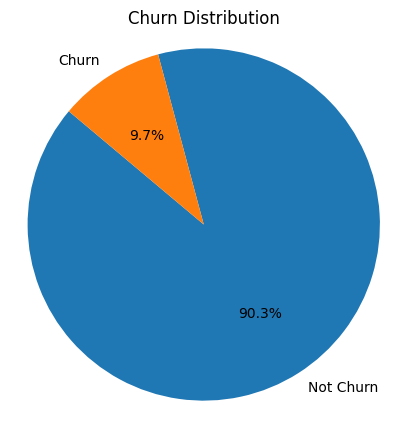

In [17]:
churn_counts = client_data['churn'].value_counts()
labels=["Not Churn","Churn"]

plt.figure(figsize=(5, 5))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Churn Distribution')
plt.axis('equal')
plt.show()

In [21]:
merged_data = pd.merge(client_data, price_data, on='id', how='inner')

**VARIOUS GRAPH REPRESENTING RELATIONSHIP BETWEEN PRICE AND CHURN AMONG CUSTOMERS**

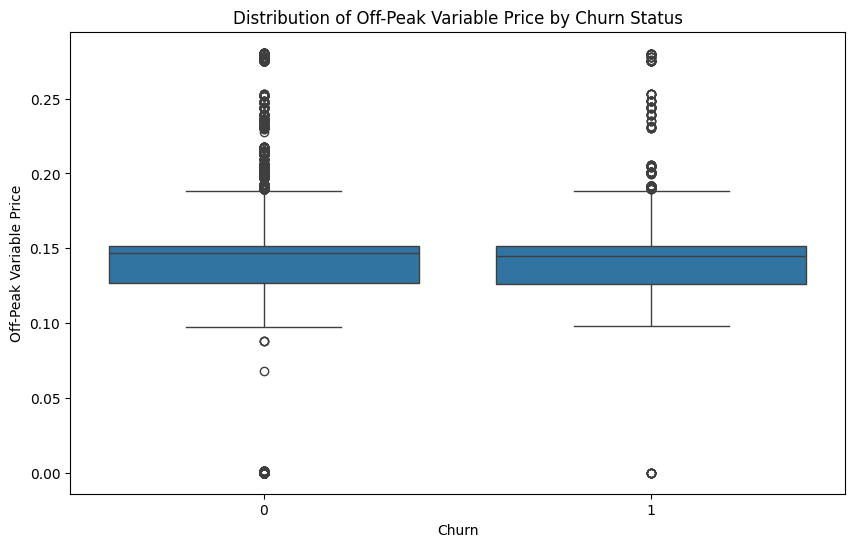

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='price_off_peak_var', data=merged_data)
plt.title('Distribution of Off-Peak Variable Price by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Off-Peak Variable Price')
plt.show()

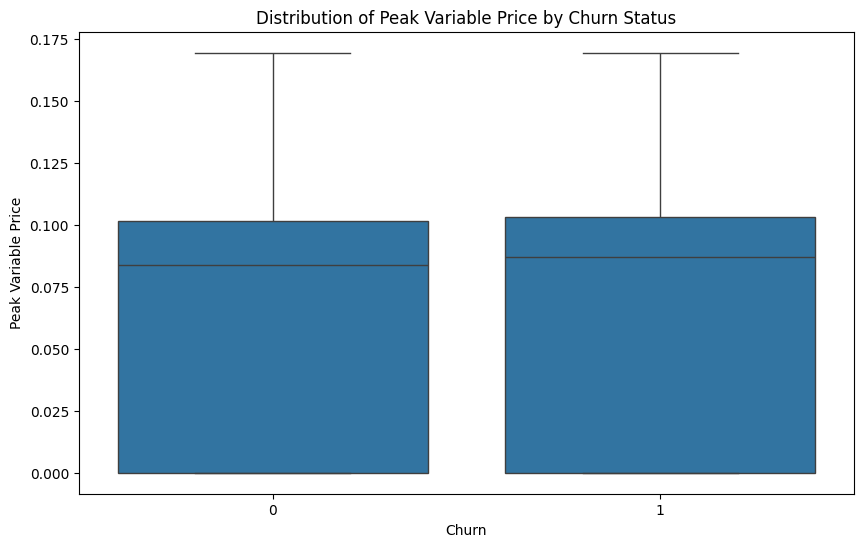

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='price_peak_var', data=merged_data)
plt.title('Distribution of Peak Variable Price by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Peak Variable Price')
plt.show()

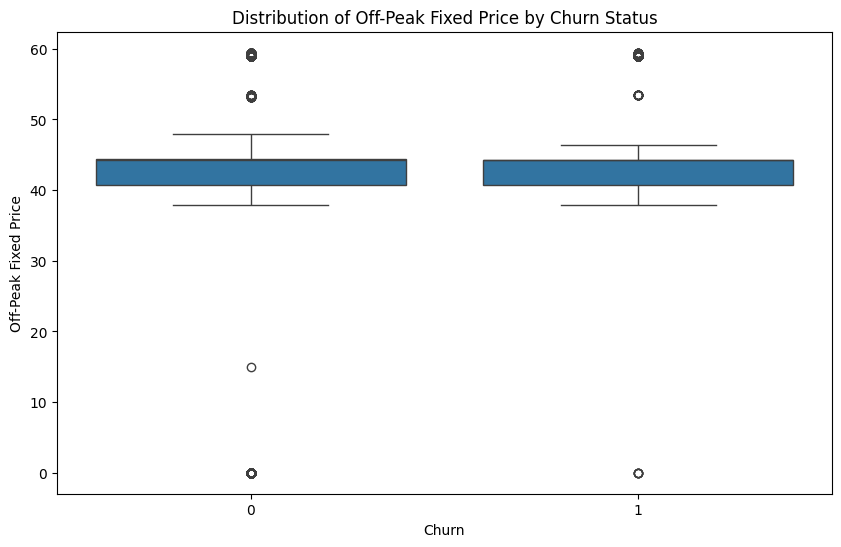

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='price_off_peak_fix', data=merged_data)
plt.title('Distribution of Off-Peak Fixed Price by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Off-Peak Fixed Price')
plt.show()


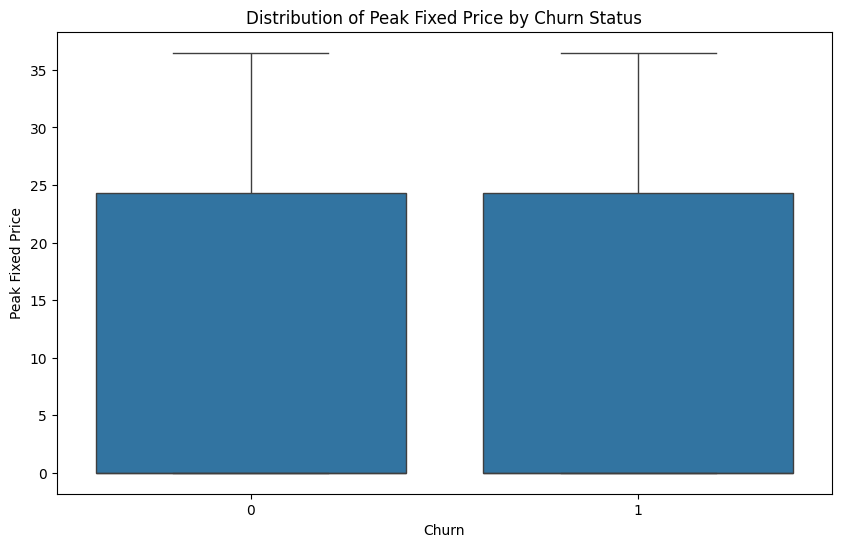

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='price_peak_fix', data=merged_data)
plt.title('Distribution of Peak Fixed Price by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Peak Fixed Price')
plt.show()

**Histograms for Consumption Data:**
Explore the distribution of electricity and gas consumption variables for churned and non-churned customers.

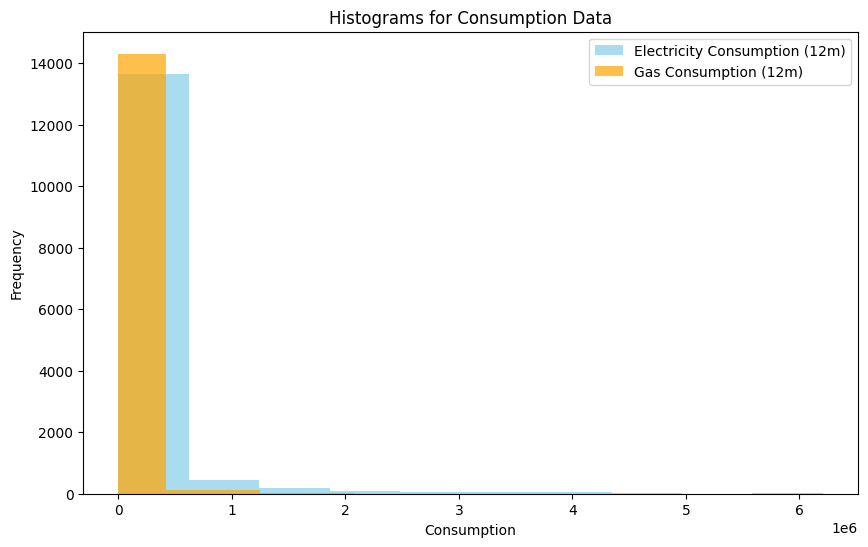

In [29]:
plt.figure(figsize=(10, 6))
plt.hist(client_data['cons_12m'], bins=10, color='skyblue', alpha=0.7, label='Electricity Consumption (12m)')
plt.hist(client_data['cons_gas_12m'], bins=10, color='orange', alpha=0.7, label='Gas Consumption (12m)')
plt.xlabel('Consumption')
plt.ylabel('Frequency')
plt.title('Histograms for Consumption Data')
plt.legend()
plt.show()

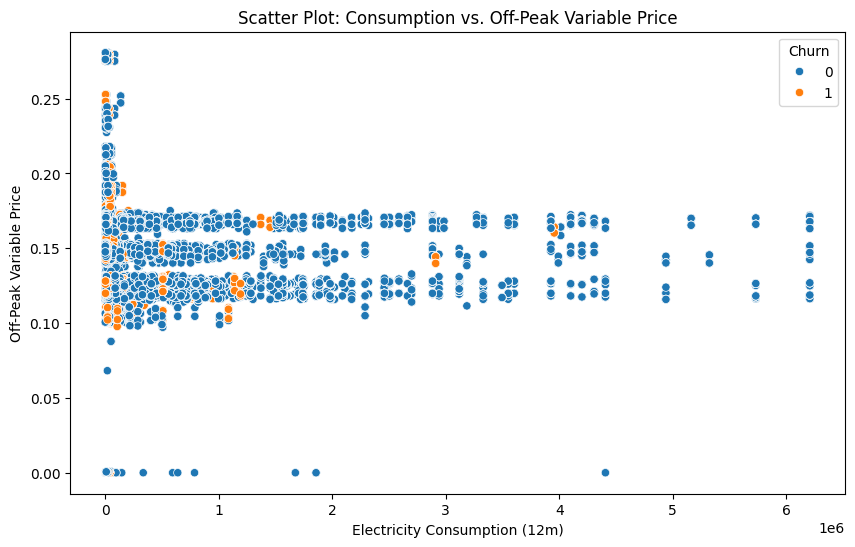

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cons_12m', y='price_off_peak_var', data=merged_data, hue='churn')
plt.xlabel('Electricity Consumption (12m)')
plt.ylabel('Off-Peak Variable Price')
plt.title('Scatter Plot: Consumption vs. Off-Peak Variable Price')
plt.legend(title='Churn')
plt.show()


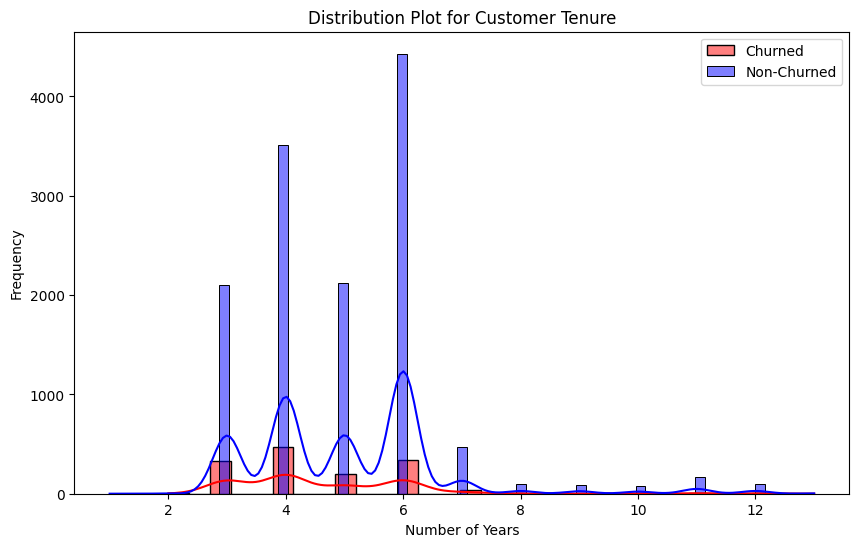

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(client_data[client_data['churn'] == 1]['num_years_antig'], kde=True, color='red', label='Churned')
sns.histplot(client_data[client_data['churn'] == 0]['num_years_antig'], kde=True, color='blue', label='Non-Churned')
plt.xlabel('Number of Years')
plt.ylabel('Frequency')
plt.title('Distribution Plot for Customer Tenure')
plt.legend()
plt.show()
